In [2]:
# Seaborn 可视化学习目标
# 1、掌握seaborn的可视化绘图方法

# Seaborn简介
#   - Seaborn是基于matplotlib的图形可视化python包。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。
#   - Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。
#   - Seaborn和Pandas的API配合的很好，使用DataFrame/Series的数据就可以绘图

In [3]:
# 导入Pandas包
import pandas as pd

# 导入seaborn包 （安装seaborn）
import seaborn as sns

In [4]:
tips = pd.read_csv('../data/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


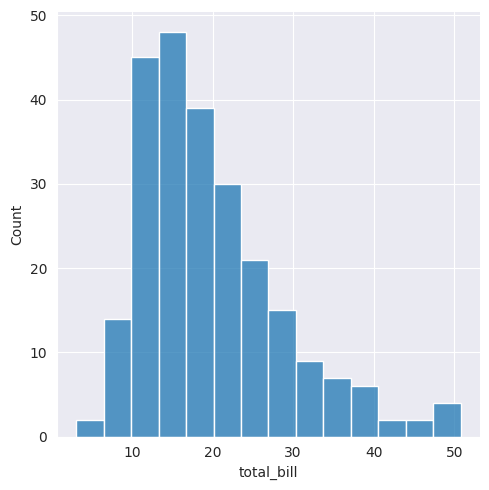

In [5]:
# 使用seaborn创建直方图
# displot还可以画密度图(核密度估计 kde)和频数图。核密度估计，就是采用平滑的峰值函数(“核”)来拟合观察到的数据点，从而对真实的概率分布曲线进行模拟。
sns.displot(tips['total_bill'])

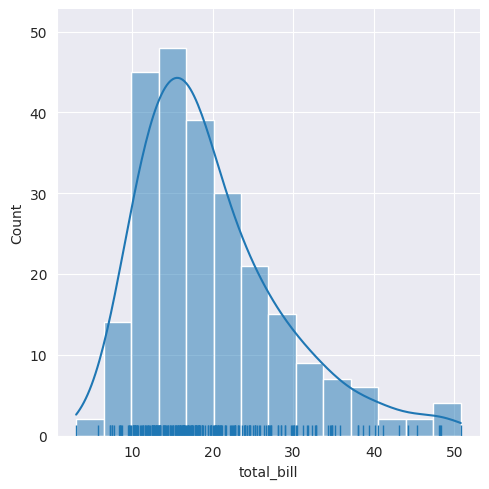

In [6]:
# 使用seaborn创建直方图，并且绘制直方图的平滑曲线
sns.displot(tips['total_bill'], kde=True, rug=True)

<Axes: xlabel='day', ylabel='count'>

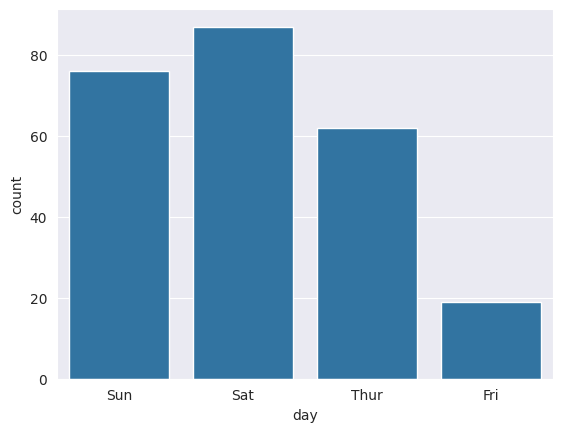

In [7]:
# 绘制记数图
sns.countplot(x='day', data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

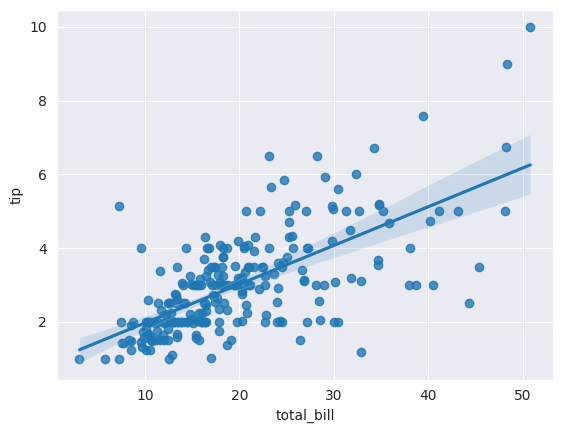

In [8]:
# Seaborn 双变量数据可视化

# 创建散点图
sns.regplot(x='total_bill', y='tip', data=tips)

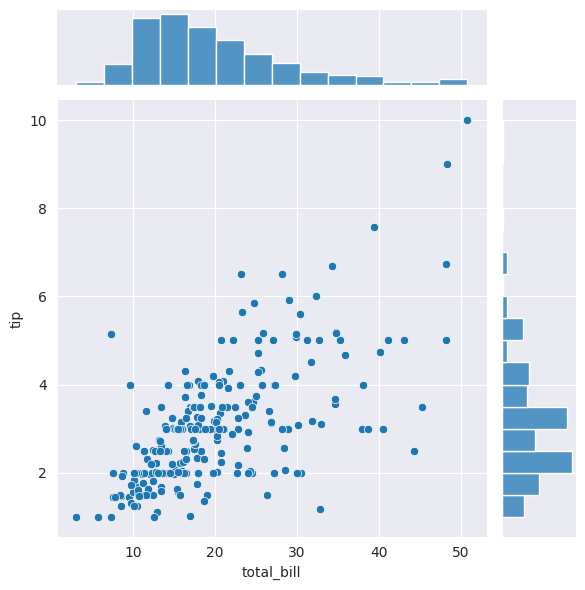

In [9]:
# 创建多变量散点图并时，在每个轴上单变量直方图
sns.jointplot(x='total_bill', y='tip', data=tips)

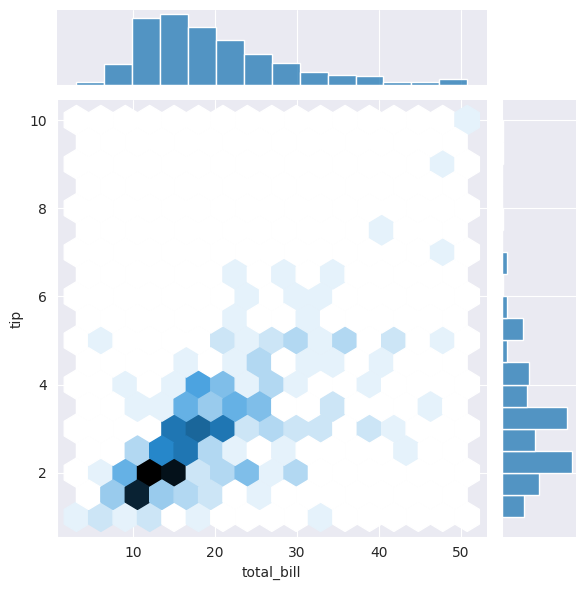

In [10]:
# 创建多变量的蜂巢图，并在每个轴上创建单变量直方图
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

<Axes: xlabel='time', ylabel='total_bill'>

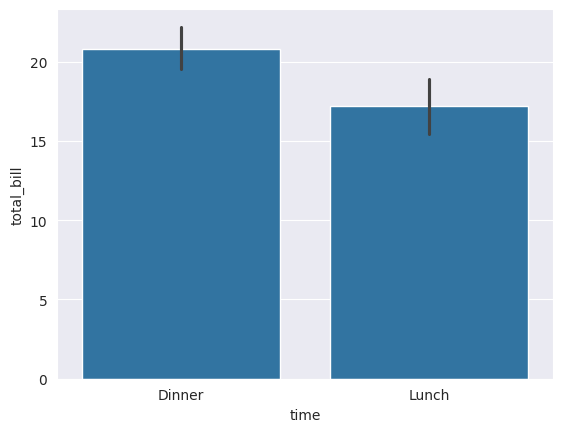

In [11]:
# 绘制条形图多变量
# 按照time进行分组，对total_bill进行聚合操作，默认是求平均的聚合函数，estimator可以接收别的聚合函数如sum
sns.barplot(x='time', y='total_bill', data=tips)

<Axes: xlabel='time', ylabel='total_bill'>

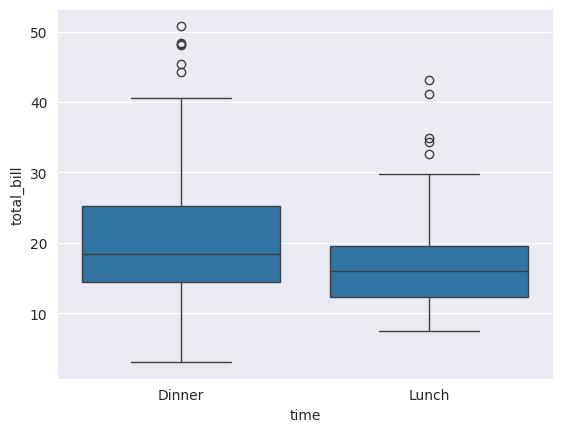

In [12]:
# 绘制箱线图用于显示多种统计信息
sns.boxplot(x='time', y='total_bill', data=tips)

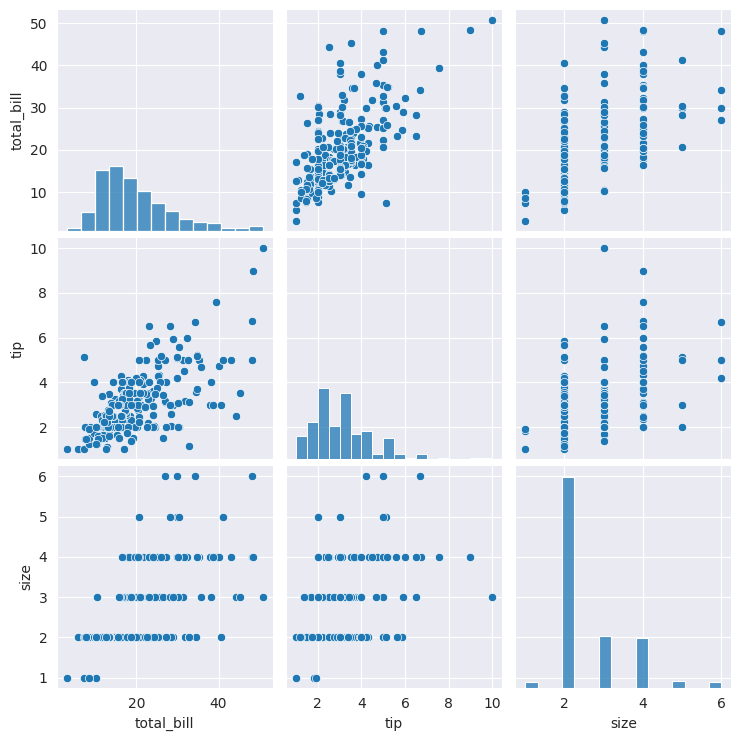

In [13]:
# 当大部分数据是数值时，可以使用pairplot函数把所有成对关系绘制出来
# pairplot函数会为单变量绘制直方图，双变量绘制散点图
sns.pairplot(tips)

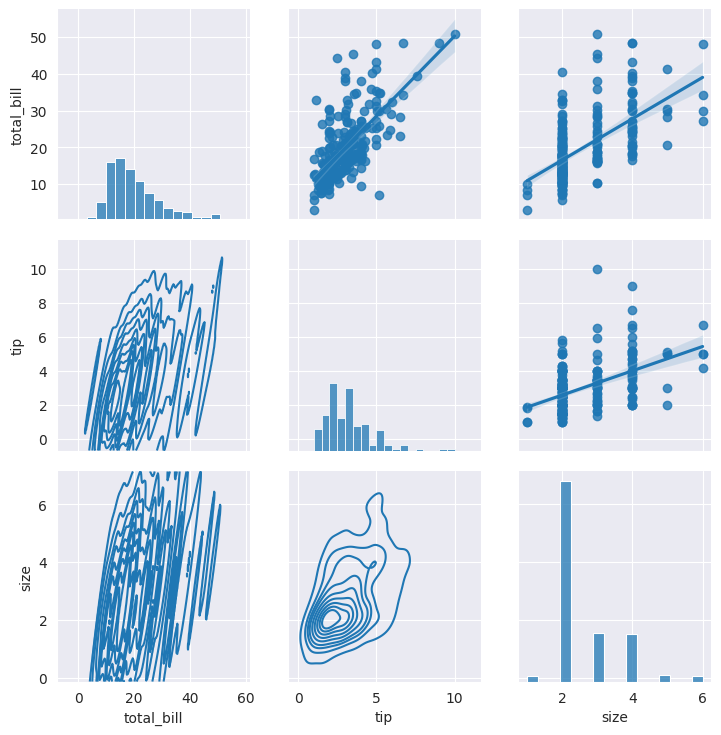

In [20]:
# pairplot缺点是存在冗余信息，图的上半部分和下半部分相同，可以使用pairgrid手动指定图上下部分
pair_grid = sns.PairGrid(tips)
pair_grid.map_upper(sns.regplot)
pair_grid.map_lower(sns.kdeplot)
pair_grid.map_diag(sns.histplot)

<Axes: xlabel='time', ylabel='total_bill'>

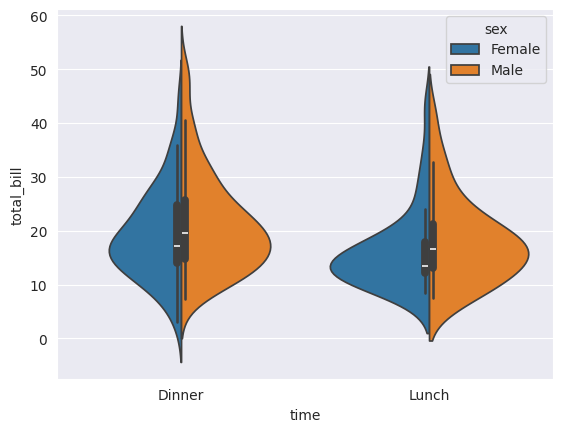

In [26]:
# 多变量的数据，可以使用途中包含更多图表颜色数据的来区分
# 绘制就餐时段和总消费之间的和性别的关系小提琴图（根据hue参数用颜色对绘图区域进行分区）
sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

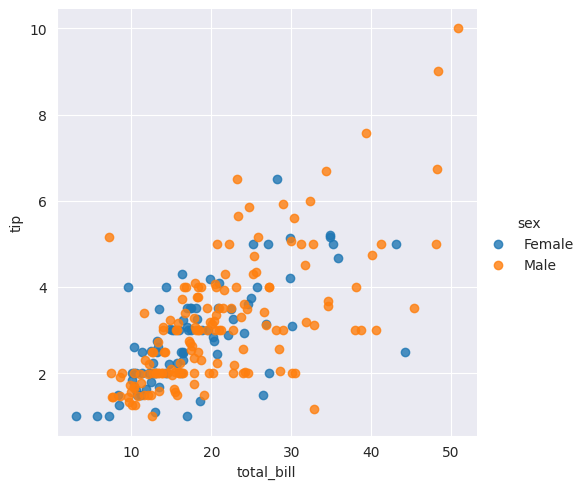

In [24]:
# 绘制出总消费和消费之间关系与性别的关联
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

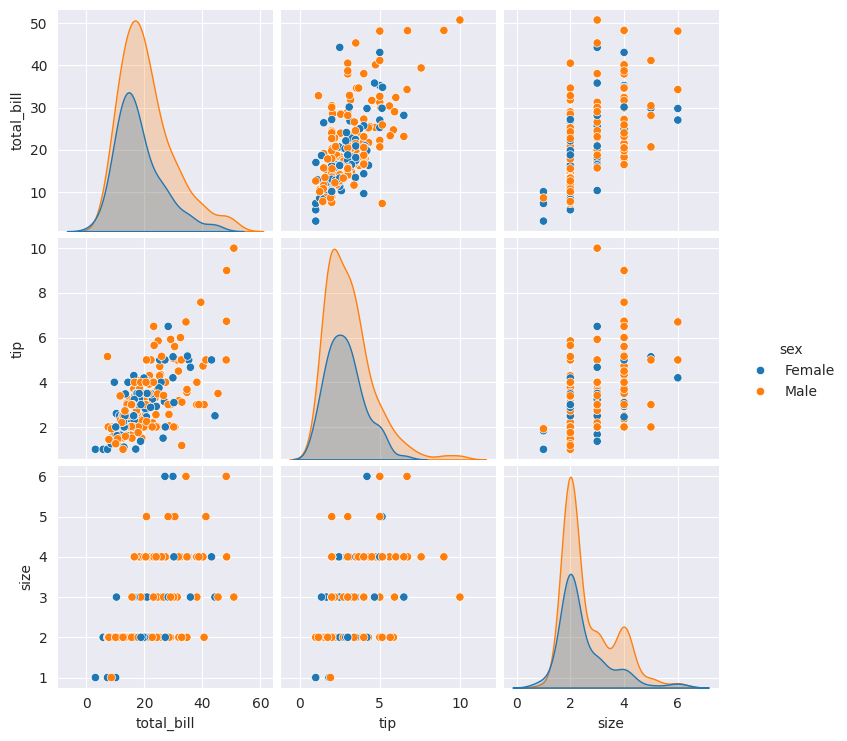

In [27]:
# 绘制根据性别分区绘制消费数据的联合
sns.pairplot(tips, hue='sex')

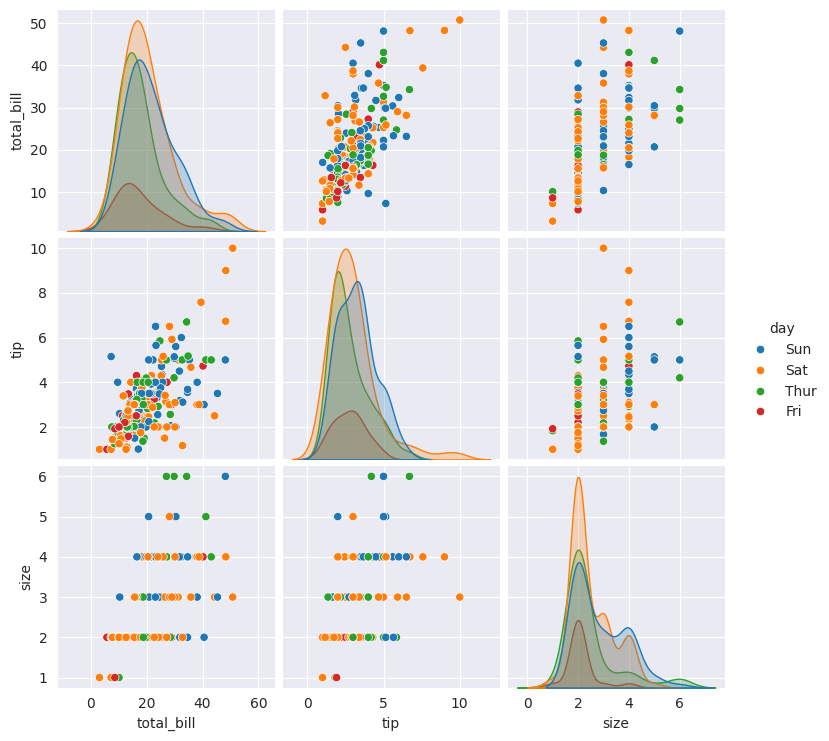

In [29]:
sns.pairplot(tips, hue='day')

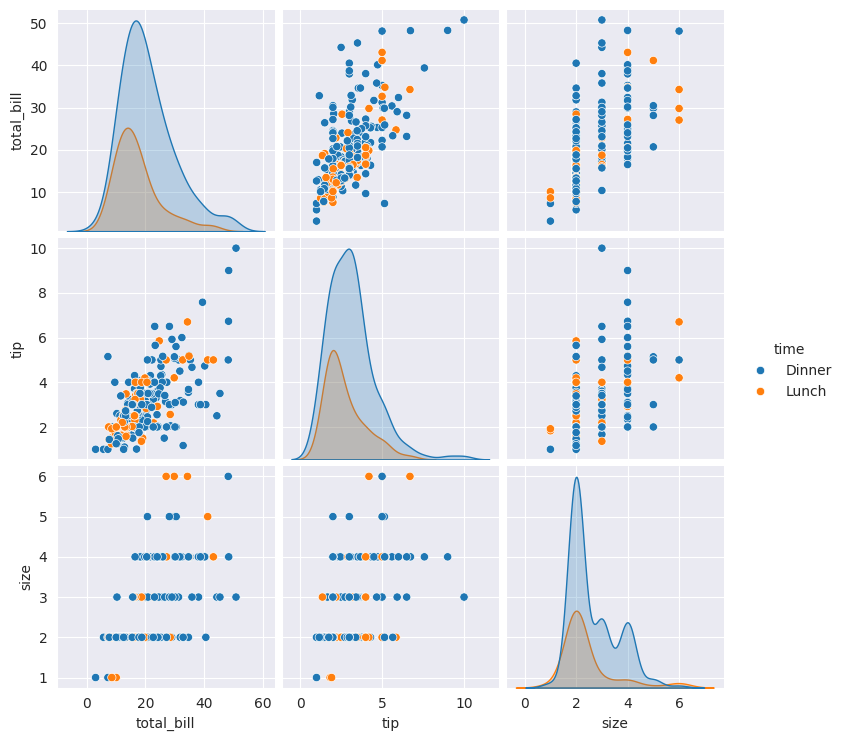

In [31]:
sns.pairplot(tips, hue='time')

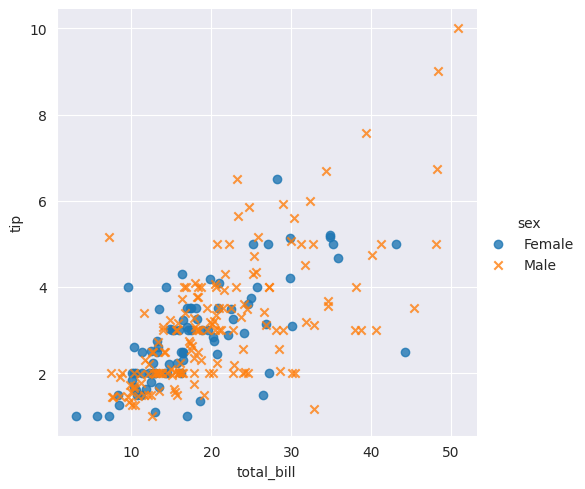

In [35]:
# 通过大小和形状区分数据
# 1、可以通过点的大小表示更多信息，但通过大小区分应谨慎使用，当大小差别不大时很难区分
# 2、在Seaborn中的lmplot，可以通过scatter_kws参数来控制散点图点的大小
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips, fit_reg=False, markers=['o', 'x'])

<Axes: xlabel='time', ylabel='total_bill'>

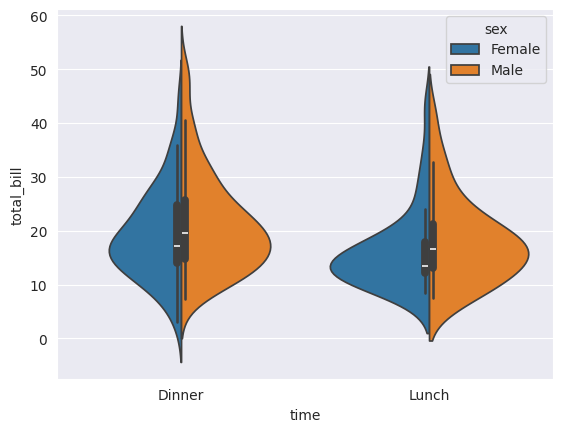

In [36]:
# 设置Seaborn的主题和
sns.violinplot(x='time',y='total_bill',hue='sex',data = tips,split = True)


<Axes: xlabel='time', ylabel='total_bill'>

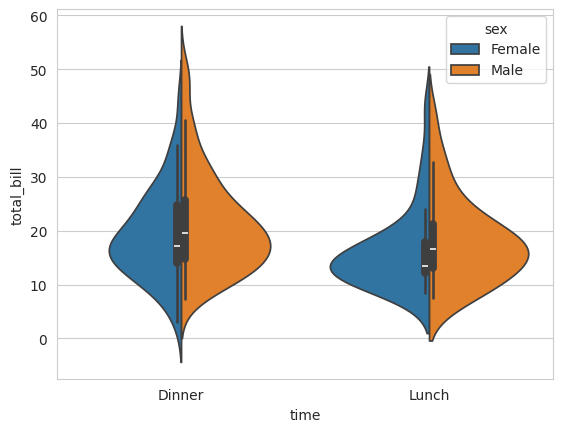

In [37]:
sns.set_style('whitegrid')
sns.violinplot(x='time',y='total_bill',hue='sex',data = tips,split = True)

In [39]:
# 小结
# 1、Seaborn是对Matplotlib以及Pandas的封装，与Series，DataFrame的API配合很好
# 2、Seaborn的API非常简单
# 3、推荐使用Seaborn或Pandas进行绘图，如果需要对图形控制比较精细，可以使用Matplotlib